## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../matplotlib_challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../matplotlib_challenge/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on=(['Mouse ID', 'Mouse ID']))

# Display the data table for preview
combined_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
# mouse_count = combined_data["Mouse ID"].unique()
# len(mouse_count)
mouse_count = combined_data_df['Mouse ID'].nunique()

mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_data_df.loc[combined_data_df['Mouse ID']=='g989', :]

dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df[combined_data_df['Mouse ID'].isin(dup_mice)==False]
# clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data_df['Mouse ID'].nunique()

clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).mean()
median = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).median()
variance = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).var()
std_deviation = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).std()
sem = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).sem()

summary_stats = pd.DataFrame(
    {
        "Average":mean,
        "Median": median,
        "Variance":variance,
        "Standard Deviation":std_deviation,
        "SEM":sem

    }
)
summary_stats


,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_aggregated = clean_data_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregated

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
mice_count = clean_data_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

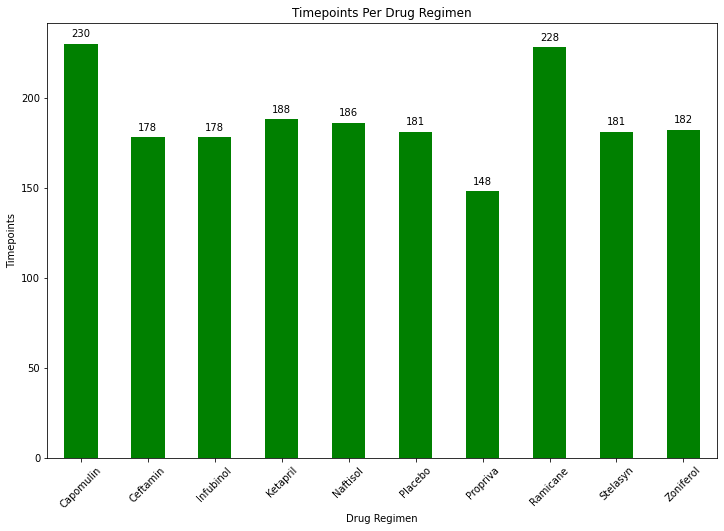

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_drug = clean_data_df.groupby('Drug Regimen')['Timepoint'].count()
tpd = timepoint_drug.plot(kind="bar", figsize=(12,8), color="g", rot=45)
tpd.bar_label(tpd.containers[0], padding=5)
plt.title("Timepoints Per Drug Regimen")
plt.ylabel("Timepoints")
plt.xlabel("Drug Regimen")

plt.tight_layout
plt.show()

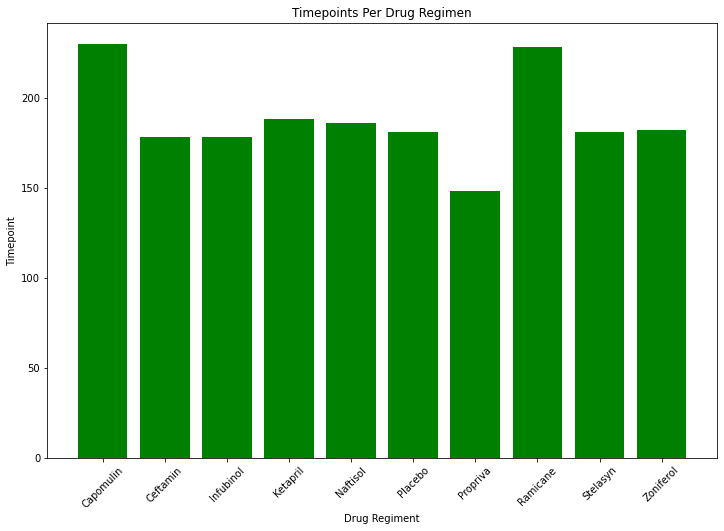

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for 
# each drug regimen using pyplot.
drug_regimen = clean_data_df['Drug Regimen'].sort_values().unique()
timepoint_count = clean_data_df.groupby('Drug Regimen')['Timepoint'].count()

x_axis = np.arange(len(drug_regimen))
tick_locations = [x for x in x_axis]

plt.figure(figsize=(12, 8))
plt.title("Timepoints Per Drug Regimen")
plt.xlabel("Drug Regiment")
plt.ylabel("Timepoint")

plt.bar(x_axis, timepoint_count, alpha=1, color="green", align="center")
plt.xticks(tick_locations, drug_regimen, color="black", rotation=45 )
plt.tight_layout
plt.show()


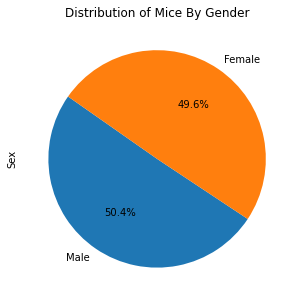

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mouse_metadata = mouse_metadata.loc[~mouse_metadata['Mouse ID'].isin(dup_mice)]
gender_distribution = clean_mouse_metadata['Sex'].value_counts()

gender_distribution.plot(kind="pie", figsize=(5,5), autopct='%1.1f%%', startangle=145)
plt.title("Distribution of Mice By Gender")
plt.show()

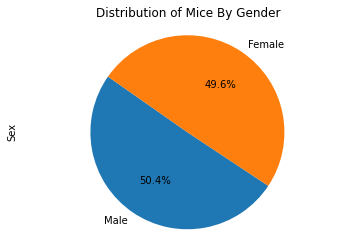

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = clean_mouse_metadata["Sex"].unique()
plt.pie(gender_distribution, labels=labels, autopct="%1.1f%%", startangle=145)
plt.axis("equal")
plt.title("Distribution of Mice By Gender")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin", :]
ramicane_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Ramicane", :]
infubinol_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Infubinol", :]
ceftamin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Ceftamin", :]

In [18]:
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [19]:
ramicane_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [20]:
infubinol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [21]:
ceftamin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [24]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(max_timepoint, clean_data_df, how="left", on=['Mouse ID', 'Timepoint'])
final_tumor_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    final_tumor_treatment = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == treatment]
    
    # add subset 
    final_tumor_volume.append(final_tumor_treatment["Tumor Volume (mm3)"])
    # print(final_tumor_volume)
    # Determine outliers using upper and lower bounds
for index, treatment in enumerate(final_tumor_volume):
    treatment_name = treatments[index]

    quartiles = treatment.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

print(f"The lower quartile of {treatment_name} is {round(lowerq, 2)}")
print(f"The upper quartile of {treatment_name} is {round(upperq, 2)}")
print(f"The interquartile range of {treatment_name} is {round(iqr, 2)}")
print(f"The median of {treatment_name} is {round(quartiles[0.5], 2)}")

# lower_bound = lowerq - (1.5 * iqr)
# upper_bound = upperq + (1.5 * iqr)
# print(" ")
# print(f"Values below {round(lower_bound, 2)} could be outliers for {treatment_name}")



The lower quartile of ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] is 48.72
The upper quartile of Ceftamin is 64.3
The interquartile range of Ceftamin is 15.58
The median of Ceftamin is 59.85


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
